In [0]:
#Imports if I need them:
import pandas as pd
import numpy as np

In [0]:
# I began with a number of functions I'd need
def mean(x):
  mean = sum(x)/len(x)
  return mean

In [0]:
def variance(x):
  def mean(y):
    m = sum(y)/len(y)
    return m
  mn = mean(x)
  def subm(z):
    sm = z - mean(x)
    return sm
  def lsubm(l):
    lsm = list(map(subm,x))
    return lsm 
  subx = lsubm(x)
  def lsqrd(a):
    def sqrd(b):
      s = b*b
      return s
    ls = list(map(sqrd,a))
    return ls
  sx2 = lsqrd(subx)
  tsx2 = sum(sx2)
  Ll = len(sx2)
  var = tsx2/Ll
  return var 

In [0]:
def standardd(d):
  def sqrt(b):
    s = b**.5
    return s
  y = variance(d)
  std = sqrt(y)
  return std

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
MSales = mean(Sales)
VSales = variance(Sales)
SSales = standardd(Sales)

In [7]:
print('This is the mean of "Sales":', MSales)
print('This is the variance "Sales":', VSales)
print('This is the standard deviation "Sales":', SSales)

This is the mean of "Sales": 3052.714285714286
This is the variance "Sales": 183761.06122448976
This is the standard deviation "Sales": 428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
Customers = [127, 80, 105, 92, 120, 115, 93]

In [9]:
print('The covariance between Sales and Customers is',
      '{:.2f}'.format(np.cov(Sales, Customers)[0][1]))

The covariance between Sales and Customers is 7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [10]:
SCustomers = standardd(Customers)
print('This is the standard deviation of Customers', SCustomers)
print('This is the standard deviation of Sales', SSales)

This is the standard deviation of Customers 15.792015549069118
This is the standard deviation of Sales 428.67360686714756


In [11]:
print(np.std(Customers))
np.std(Sales)

15.792015549069118


428.67360686714756

In [12]:
SC = pd.DataFrame({"Sales": Sales}).append(pd.DataFrame({"Customers": Customers}))
SC['Sales'] = pd.Series(Sales)
SC['Customers'] = pd.Series(Customers)
num = SC['Sales'].cov(SC['Customers'])
den = SSales * SCustomers
CorrSC = num/den
print('Has a correlation coefficient of','{:.15f}'.format(CorrSC))

Has a correlation coefficient of 1.036898129954498


In [13]:
SC

,Sales,Customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93
0,3505,127
1,2400,80
2,3027,105


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [14]:
TD = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
TD.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [15]:
TD.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [16]:
TD.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
Highroad = [4,1]
Lowroad = [-1,4]

In [19]:
H = np.array(Highroad)
L = np.array(Lowroad)
np.dot(H,L)

0

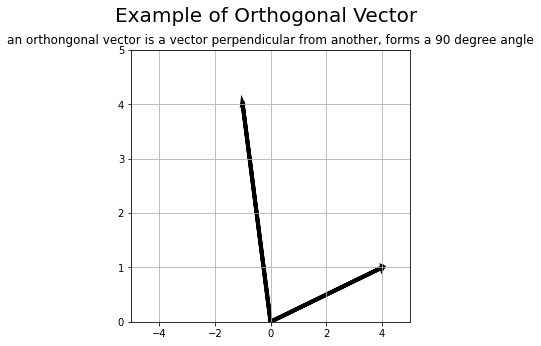

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
ax.grid()
plt.xlim(-5, 5)          
plt.ylim(0,5)

# Plot the vectors
for vector in [Highroad, Lowroad]:
    plt.arrow(0,0, vector[0], vector[1], head_width=.04, head_length=0.04, linewidth=4)

plt.title('an orthongonal vector is a vector perpendicular from another, forms a 90 degree angle')
plt.suptitle('Example of Orthogonal Vector',fontsize=20, y=1);

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [21]:
a = np.array([-5, 3,7])
b = np.array([6,-8,2])
print('The dot product of'+'\033[1m'+ ' a', 
      '\033[0m'+'and','\033[1m'+'b', '\033[0m'+'is', np.dot(a,b),'.',
      'For the vectors to be orthogonal the dot product would need to be 0.')

The dot product of a and b is -40 . For the vectors to be orthogonal the dot product would need to be 0.


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [22]:
c = np.array([2,-15,6,20])
cl = np.linalg.norm(c)**2
cdc = np.dot(c,c)
cTc = sum(c.T*c)
print('The three quantities are exact:')
print(cl)
print(cdc)
print(cTc)

The three quantities are exact:
665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
de = 7\begin{bmatrix} 2 & 11 & -8 \end{bmatrix} +
12\begin{bmatrix} 2 & 11 & -8 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [23]:
f = np.array([4, 12, 11, 9, 2])
# find the length
fl = np.linalg.norm(f)
print('the length of','\033[1m'+'f','\033[0m'+'is', fl)
# use that to find the unit vector
uvf = f/np.linalg.norm(f)
print('the unit vector of', '\033[1m'+'f', '\033[0m'+'is', uvf)

the length of f is 19.131126469708992
the unit vector of f is [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

In [24]:
Magic = np.array([1,3])
Miracles = np.multiply(Magic, 2)
print(Magic)
print(Miracles)

[1 3]
[2 6]


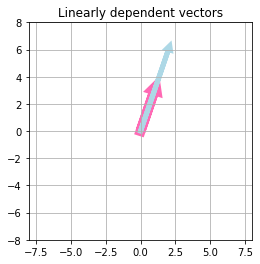

In [25]:
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-8,8)          
plt.ylim(-8,8)

for vect, mycolor, width in [(Magic, 'hotpink', 10), (Miracles, 'lightblue', 5)]:
    plt.arrow(0,0,
              vect[0], 
              vect[1], 
              head_width=.3, 
              head_length=0.3, 
              linewidth=width, 
              color=mycolor)
plt.title('Linearly dependent vectors');

In [0]:
Ham = np.array([4,2])
Cows = np.array([2,3])

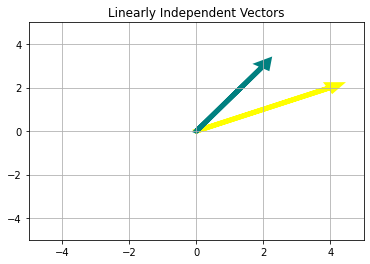

In [27]:
Fig, Ax = plt.subplots()
Ax.grid()
plt.xlim(-5,5)
plt.ylim(-5,5)

plt.arrow(0, 0, 
          Ham[0], 
          Ham[1], 
          head_width=.3, 
          head_length=.3,
          linewidth=5,
          color = 'yellow')

plt.arrow(0, 0, 
          Cows[0], 
          Cows[1], 
          head_width=.3, 
          head_length=.3,
          linewidth=5,
          color = 'teal')
plt.title('Linearly Independent Vectors');

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1,2])
h = np.array([4,8])

In [29]:
spanv=[]
for (a,b) in [(2,3), (4,5), (6,7), (8,9)]:
    lc = np.multiply(g, a) + np.multiply(h, b) 
    spanv.append(lc)
print(spanv)

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [30]:
l = [1,2,3]
m = [-1, 0, 7]
n = [4, 8, 2]
lmn = np.array([[l],[m],[n]])
lmn

array([[[ 1,  2,  3]],

       [[-1,  0,  7]],

       [[ 4,  8,  2]]])

In [31]:
span=[]
for (a,b,c) in [(2,3,4), (4,5,6), (6,7,8), (7,8,9)]:
    LC = np.array(np.multiply(lmn,a) + np.multiply(lmn,b) + np.multiply(lmn,c))
    span.append(LC)
print(span)

[array([[[ 9, 18, 27]],

       [[-9,  0, 63]],

       [[36, 72, 18]]]), array([[[ 15,  30,  45]],

       [[-15,   0, 105]],

       [[ 60, 120,  30]]]), array([[[ 21,  42,  63]],

       [[-21,   0, 147]],

       [[ 84, 168,  42]]]), array([[[ 24,  48,  72]],

       [[-24,   0, 168]],

       [[ 96, 192,  48]]])]


# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



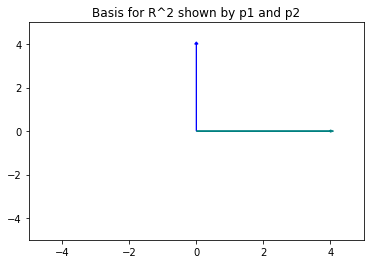

In [38]:
# find basis vectors in 2-d
p1 = np.array([0,4])
p2 = np.array([4,0])

# Plot the Scaled Vectors
plt.arrow(0,0, p1[0], p1[1],head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0,0, p2[0], p2[1],head_width=.1, head_length=0.1, color ='teal')
plt.xlim(-5,5)          
plt.ylim(-5,5)
plt.title("Basis for R^2 shown by p1 and p2");

## 6.2 What does it mean to form a basis?

Forming a basis means making a set of vectors that is the basis for a set of linearly independent vectors in a vector space. The basis is used to create linear combinations that fills the vector space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [40]:
P = np.array([[1,2,3],[-1, 0, 7],[4,8,2]])
print('The Rank of P is',np.linalg.matrix_rank(P))

The Rank of P is 3


## 7.2 What does the rank of a matrix tell us?

The rank of a matrix tells of the number of dimensions spanned by the linearly independent vectors of that matrix.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
#original
v = np.array([2,1])
w = np.array([-3,3])

In [0]:
#dot product
top = np.dot(v,w)
botm = np.dot(v,v)

In [63]:
#projection
fraction = top/botm
proj = np.multiply(fraction,v)
proj

array([-1.2, -0.6])

In [0]:
t = np.dot(w,v)
b = np.dot(w,w)
f = t/b
p = np.multiply(f,w)

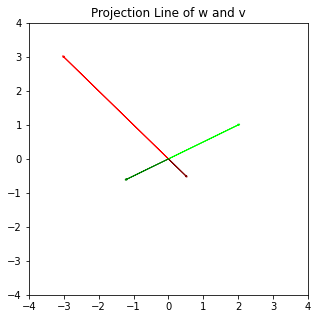

In [70]:
Fig, axes = plt.subplots(1, 1, figsize=(5,5))
plt.xlim(-4, 4)
plt.ylim(-4, 4)

# Scaled Vectors
plt.arrow(0,0, w[0], w[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, v[0], v[1],head_width=.05, head_length=0.05, color ='lime')
plt.arrow(0,0, p[0], p[1],head_width=.05, head_length=0.05, color ='maroon')
plt.arrow(0,0, proj[0], proj[1],head_width=.05, head_length=0.05, color ='green')
plt.title('Projection Line of w and v');

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

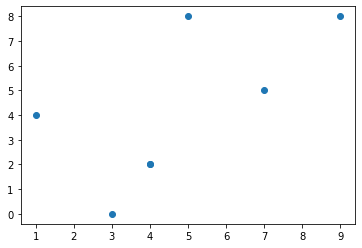

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()